# Census Data Exploration
Ben Bressette

I am using this assignment opportunity to rework some of the things in this file that didn't work properly and I didn't have the patience to fix :)

Namely, I am going to narrow it down to one dataset, and then actually go through and clean the data (that is, rename the columns). 

--

Our group project is a comparison of accessibility and mobility in Los Angeles neighborhoods. We seek to grasp how different neighborhoods and demographic compositions experience daily life in their own neighborhood and the broader city. We will be using data from the American Community Survey, LA Metro, the City of LA, LA Times, and the Bureau of Transportation Statistics.

My partner, Andrew Williams, looked at a variety of data that explores the means of transportation to work at the census tract level. I will analyze race, income, and density at the same level across the City of LA. 

## Preparing data libraries

In [2]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

This step is directly from the class lab, and will allow us to properly analyze and visualize our data.

## Load Census data

I will load one Census data table:

Table B19013: Median Household Income in the Last 12 Months

In [3]:
# loading the three data files

gdf_income = gpd.read_file('data/acs2019_5yr_B19013_income.geojson')

## Begin to look at the data
Since there are three different datasets, we will need to run commands for each one. 

In [4]:
gdf_income.shape

(1005, 5)

In [6]:
gdf_income.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,16806.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,11857.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [7]:
# columns to keep
columns_to_keep = ['geoid',
 'name',
 'B19013001',
 'geometry']

In [9]:
# redefine gdf with only columns to keep
gdf_income = gdf_income[columns_to_keep]

In [10]:
# check the slimmed down gdf
gdf_income.head()

,geoid,name,B19013001,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [14]:
gdf_income.columns = ['geoid',
 'name',
 'Median Income',
 'geometry']

In [15]:
gdf_income.head()

,geoid,name,Median Income,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


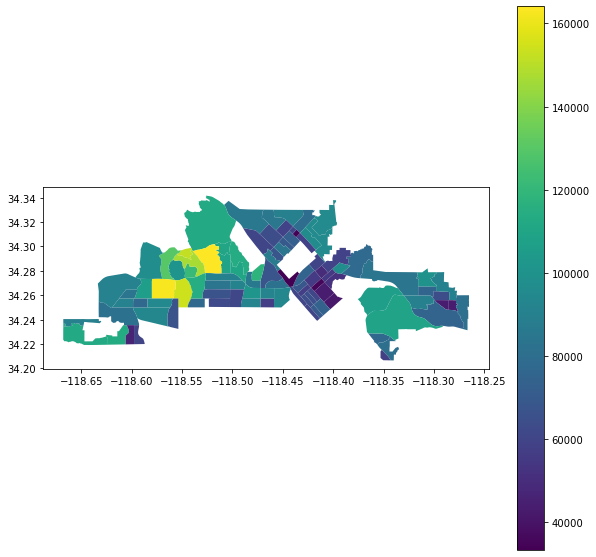

In [16]:
gdf_income.head(100).plot(figsize=(10,10),column='Median Income',legend=True)

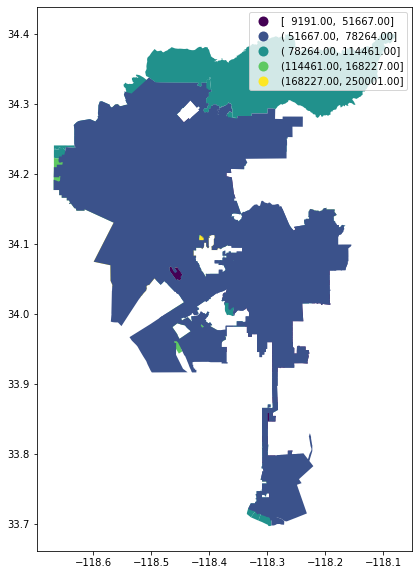

In [17]:
gdf_income.plot(figsize=(12,10),
                 column='Median Income',
                 legend=True, 
                 scheme='NaturalBreaks')

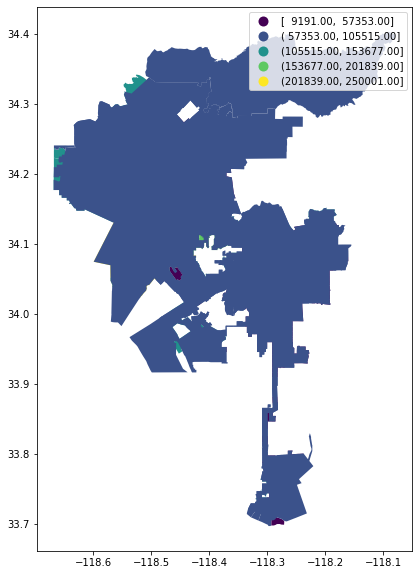

In [18]:
gdf_income.plot(figsize=(12,10),
                 column='Median Income',
                 legend=True, 
                 scheme='equal_interval')

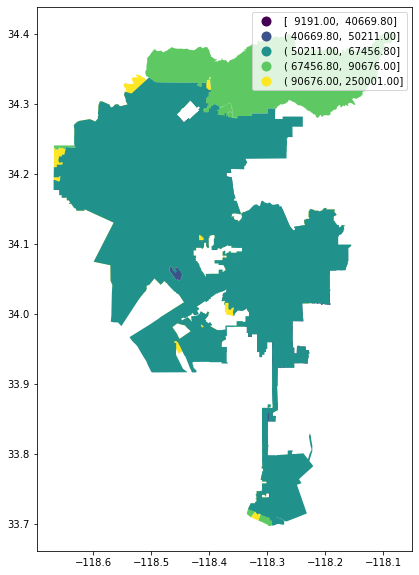

In [19]:
gdf_income.plot(figsize=(12,10),
                 column='Median Income',
                 legend=True, 
                 scheme='quantiles')

Text(0.5, 1.0, 'Median Income')

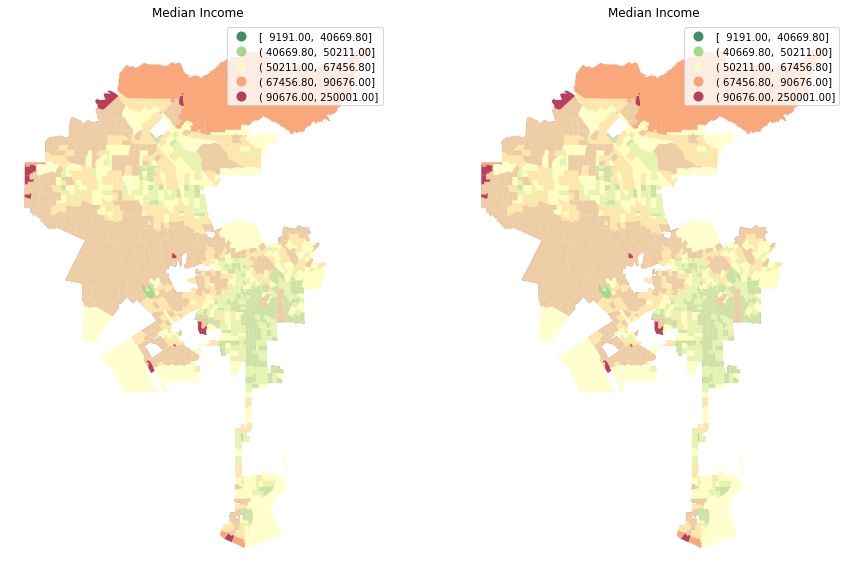

In [21]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
gdf_income.plot(column='Median Income', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Median Income")

# spatial lag map on the right
gdf_income.plot(column='Median Income', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Median Income")

In [22]:
gdf_income

,geoid,name,Median Income,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."
...,...,...,...,...
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
